In [108]:
# 绘制决策边界
def plot_decision_boundary(mode, X,y,n):
    """
    绘制决策边界
    :param clf: 模型
    :param X: 样本特征
    :param y: 样本标记
    """

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
    y_ = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # cmap = plt.cm.Spectral 表示根据c值绘制不同颜色进行区分,也可以分别指定颜色绘制
#     plt.contourf(xx, yy, y_predict, cmap=plt.cm.Spectral, alpha=0.2)
    plt.pcolormesh(xx, yy , y_.reshape(xx.shape))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## 2、小麦种类预测

In [95]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [96]:
data = pd.read_csv('./seeds.tsv',sep='\s+')
data.head()

15.26  14.84   0.871  5.763  3.312  2.221   5.22  Kama
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  Kama
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  Kama
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  Kama
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  Kama
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  Kama

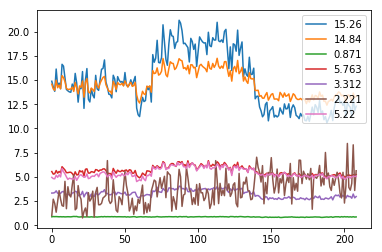

In [97]:
data.plot()

In [98]:
data['Kama'].unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

In [99]:
data['Kama'] = data['Kama'].map({'Kama':0,'Rosa':1,'Canadian':2})
data.head()

15.26  14.84   0.871  5.763  3.312  2.221   5.22  Kama
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956     0
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825     0
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805     0
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175     0
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956     0

In [100]:
X,Y = data.iloc[:,:-1].values,data['Kama'].values
display(X.shape, Y.shape)

(209, 7)

(209,)

In [101]:
# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

seed = KNeighborsClassifier(n_neighbors=7)
seed.fit(X_train[:,(0,1)],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [102]:
y_ = seed.predict(X_test[:,(0,1)])
y_

array([0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1],
      dtype=int64)

In [103]:
#手动评分
(y_ == y_test).sum()/y_test.size

0.8412698412698413

In [104]:
seed.score(X_test[:,(0,1)],y_test)

0.8412698412698413

In [105]:
seed.score(X_train[:,(0,1)],y_train)

0.8835616438356164

In [106]:
X

array([[14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955, ...,  3.379 ,  2.259 ,  4.805 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

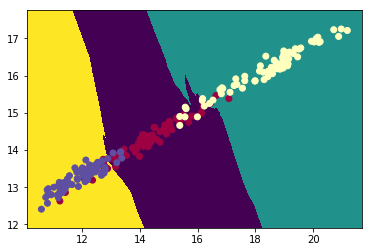

In [109]:
plot_decision_boundary(seed,X,Y,1000)

## 3、改进约会网站的匹配效果

In [54]:
dating = pd.read_csv('./datingTestSet.txt',sep='\s+')
dating.head()

40920   8.326976  0.953952  largeDoses
0  14488   7.153469  1.673904  smallDoses
1  26052   1.441871  0.805124   didntLike
2  75136  13.147394  0.428964   didntLike
3  38344   1.669788  0.134296   didntLike
4  72993  10.141740  1.032955   didntLike

In [55]:
dating['largeDoses'].unique()

array(['smallDoses', 'didntLike', 'largeDoses'], dtype=object)

In [56]:
X,Y = dating.iloc[:,:-1].values,dating['largeDoses'].values
display(X.shape, Y.shape)

(999, 3)

(999,)

In [57]:
# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

dating = KNeighborsClassifier(n_neighbors=7)
dating.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [58]:
y_ = dating.predict(X_test)
y_

array(['largeDoses', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'didntLike', 'largeDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'didntLike', 'smallDoses', 'largeDoses', 'smallDoses',
       'smallDoses', 'smallDoses', 'didntLike', 'didntLike', 'largeDoses',
       'largeDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'didntLike',
       'smallDoses', 'smallDoses', 'smallDoses', 'didntLike',
       'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'largeDoses',
       'largeDoses', 'didntLike', 'didntLike', 'didntLike', 'smallDoses',
       'smallDoses', 'smallDoses', 'smallDoses', 'largeDoses',
       'didntLike', 'largeDoses', 'smallDoses', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
    

In [59]:
dating.score(X_test,y_test)

0.79